In [22]:
import requests
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import alpaca_trade_api as tradeapi
import hvplot.pandas

ModuleNotFoundError: No module named 'hvplot'

In [ ]:
load_dotenv()

True

In [3]:
api_key=os.getenv("ALPACA_API_KEY")

In [4]:
api_secret_key=os.getenv("ALPACA_SECRET_KEY")

In [5]:
api_key

'PKOHST2FASMLCQE6CSOP'

In [6]:
api_secret_key

'rp3dDDwRmc6P3SSZIwirnboYWJvtkOpcscLJm48Z'

In [8]:
url = ('https://newsapi.org/v2/top-headlines?sources=bbc-news&apiKey=853e9a685a08416da24c972101de8eee')

In [9]:
# response = requests.get(url)
# print(response.json())

In [28]:

alpaca = tradeapi.REST(
    api_key,
    api_secret_key,
    api_version="v2")

In [12]:
stock_tickers = ["AMZN", "GOOG", "TSLA", "MCD", "XOM"]
start_date = pd.Timestamp("2018-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-05-01", tz="America/New_York").isoformat()
timeframe = "1Day"

In [29]:
stock_df_portfolio = alpaca.get_bars(
    stock_tickers,
    timeframe,
    start_date,
    end_date
).df
stock_df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2018-05-01 04:00:00+00:00,1563.220,1585.0000,1552.1800,1582.260,4572091,91379,1571.199180,AMZN
2018-05-02 04:00:00+00:00,1580.980,1588.4992,1566.3600,1569.680,4360674,89539,1577.052810,AMZN
2018-05-03 04:00:00+00:00,1560.010,1574.8000,1546.0200,1572.075,4251917,93849,1562.809882,AMZN
2018-05-04 04:00:00+00:00,1562.450,1584.9000,1562.1900,1580.950,3443567,76205,1578.041481,AMZN
2018-05-07 04:00:00+00:00,1589.337,1606.9490,1587.8300,1600.140,3807853,85050,1599.382013,AMZN
...,...,...,...,...,...,...,...,...
2023-04-25 04:00:00+00:00,117.550,117.7400,115.6300,116.520,12180541,114799,116.422029,XOM
2023-04-26 04:00:00+00:00,116.030,117.0900,114.6800,115.450,15567368,121928,115.687788,XOM
2023-04-27 04:00:00+00:00,115.620,117.0100,114.8818,116.830,16278977,148902,116.091493,XOM


<Axes: xlabel='timestamp'>

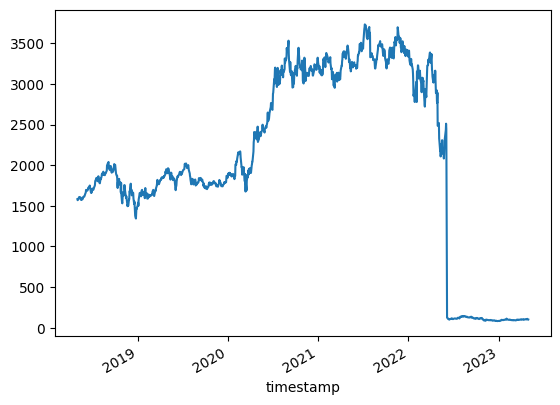

In [30]:
stock_df_portfolio_AMZN = stock_df_portfolio[stock_df_portfolio['symbol'] == 'AMZN'].drop('symbol', axis = 1)

stock_df_portfolio_AMZN['close'].plot()

<Axes: xlabel='timestamp'>

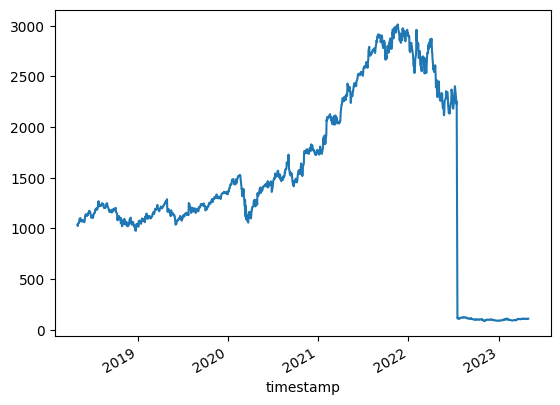

In [24]:
stock_df_portfolio_GOOG = stock_df_portfolio[stock_df_portfolio['symbol'] == 'GOOG'].drop('symbol', axis = 1)

stock_df_portfolio_GOOG['close'].plot()

In [ ]:

stock_df_portfolio_tsla = tradeapi.get_bars(
    stock_tickers[2],
    timeframe,
    start_date,
    end_date
).df

stock_df_portfolio_tsla['close'].hvplot()

In [ ]:
stock_df_portfolio_mcd = tradeapi.get_bars(
    stock_tickers[3],
    timeframe,
    start_date,
    end_date
).df

stock_df_portfolio_mcd['close'].hvplot()

In [ ]:
stock_df_portfolio_xom = tradeapi.get_bars(
    stock_tickers[4],
    timeframe,
    start_date,
    end_date
).df

stock_df_portfolio_xom['close'].hvplot()

In [ ]:
stock_df_portfolio_amzn['close'].hvplot() * stock_df_portfolio_goog['close'].hvplot() * stock_df_portfolio_tsla['close'].hvplot() * stock_df_portfolio_mcd['close'].hvplot()* stock_df_portfolio_xom['close'].hvplot()


In [26]:
crypto_df_portfolio_all = alpaca.get_crypto_bars(
    crypto_tickers,
    timeframe,
    start_date,
    end_date
).df

crypto_df_portfolio_all

AttributeError: module 'alpaca_trade_api' has no attribute 'get_bars'

In [35]:
crypto_df_portfolio_btc = alpaca.get_crypto_bars(
    ['BTC/USD'],
    timeframe,
    start_date,
    end_date
).df

crypto_df_portfolio_btc#['close'].hvplot()


,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2021-01-01 06:00:00+00:00,29676.79,29682.29,28707.56,29639,29255.71,848.874030,29316.444625,BTC/USD
2021-01-02 06:00:00+00:00,33769.52,34200.00,29555.99,60152,29678.34,2144.592516,31941.412694,BTC/USD
2021-01-03 06:00:00+00:00,32908.02,34812.93,32300.61,58725,33769.52,1838.695433,33505.269474,BTC/USD
2021-01-04 06:00:00+00:00,30441.57,33496.03,27900.00,69226,32907.36,2711.189503,31267.965121,BTC/USD
2021-01-05 06:00:00+00:00,35063.00,35851.42,29927.55,61880,30461.84,1756.751333,33151.367357,BTC/USD
...,...,...,...,...,...,...,...,...
2023-04-26 05:00:00+00:00,29119.00,30046.27,27261.01,294221,28347.67,18220.450229,28896.350590,BTC/USD
2023-04-27 05:00:00+00:00,29537.16,29912.28,28646.88,191194,29119.00,12428.400177,29293.599261,BTC/USD
2023-04-28 05:00:00+00:00,29420.00,29608.47,28922.03,89534,29542.61,5359.938636,29297.215374,BTC/USD


In [ ]:
crypto_df_portfolio_ltc = tradeapi.get_bars(
    crypto_tickers[2],
    timeframe,
    start_date,
    end_date
).df

crypto_df_portfolio_ltc['close'].hvplot()

In [ ]:

crypto_df_portfolio_eth = tradeapi.get_bars(
    crypto_tickers[4],
    timeframe,
    start_date,
    end_date
).df

crypto_df_portfolio_eth['close'].hvplot()

Here are some of the significant events that occurred during the week of August 26, 2018, to September 1, 2018:

The funeral of Senator John McCain took place on September 1, 2018. McCain was a former presidential candidate and a longtime senator from Arizona who passed away on August 25, 2018, after battling brain cancer. The funeral was attended by former presidents Barack Obama and George W. Bush, among other political leaders.

Hurricane Lane hit Hawaii on August 23, 2018, causing significant damage and flooding. The hurricane was downgraded to a tropical storm on August 25, but it still caused widespread power outages and damage to infrastructure.

On August 27, 2018, President Trump announced that the United States had reached a trade agreement with Mexico, which would replace the North American Free Trade Agreement (NAFTA). The announcement was met with mixed reactions, with some critics arguing that the new agreement did not go far enough in protecting American workers.

The trial of former Trump campaign chairman Paul Manafort continued during this week, with prosecutors presenting evidence of his alleged financial crimes. The trial was closely watched as part of the ongoing investigation into Russian interference in the 2016 presidential election.

On August 30, 2018, it was reported that the United States had expelled two Cuban diplomats in response to mysterious illnesses experienced by American diplomats in Cuba. The illnesses, which first came to light in 2016, have been attributed to a possible sonic attack.


Here are some significant events that occurred during the week of December 23, 2018, to December 29, 2018:

On December 23, 2018, a tsunami struck the Sunda Strait in Indonesia, killing over 400 people and injuring thousands more. The tsunami was triggered by an underwater landslide caused by the eruption of Anak Krakatau, a volcano in the region.

The U.S. government began a partial shutdown on December 22, 2018, due to a disagreement between President Trump and Congress over funding for a proposed border wall. The shutdown continued throughout the week, affecting hundreds of thousands of federal workers and causing widespread disruption.

On December 24, 2018, President Trump made a surprise visit to U.S. troops stationed in Iraq. The visit was the first time Trump had visited troops in a combat zone since taking office in January 2017.

Protests broke out in several cities in Sudan on December 19, 2018, after the government announced cuts to bread subsidies. The protests continued throughout the week, with demonstrators calling for the ouster of President Omar al-Bashir.

On December 27, 2018, former Pakistani Prime Minister Nawaz Sharif was sentenced to seven years in prison on corruption charges. Sharif had previously been disqualified from holding public office in Pakistan in 2017.

Here are some significant events that occurred during the week of August 15, 2021, to August 21, 2021:

The Taliban seized control of Kabul, the capital city of Afghanistan, on August 15, 2021. The rapid collapse of the Afghan government and the return of the Taliban sparked a humanitarian crisis and raised concerns about the future of the country.

Haiti was hit by a 7.2 magnitude earthquake on August 14, 2021, which killed over 2,200 people and injured thousands more. The earthquake caused widespread damage to infrastructure and left many Haitians without access to basic necessities like food, water, and shelter.

On August 19, 2021, the United States Food and Drug Administration (FDA) granted full approval to the Pfizer-BioNTech COVID-19 vaccine for people aged 16 and older. The approval was seen as a significant milestone in the fight against the COVID-19 pandemic.

The United Nations Intergovernmental Panel on Climate Change (IPCC) released a report on August 9, 2021, warning that climate change is already having devastating impacts on the planet and that urgent action is needed to avoid the worst effects of global warming.

The Belarusian government forced a commercial airliner to land in Minsk on May 23, 2021, in order to arrest journalist Roman Protasevich, who was on board. The incident sparked international condemnation and raised concerns about the safety of air travel.


Here are some significant events that occurred during the week of July 4, 2021, to July 10, 2021:

The death toll from the Surfside condo collapse in Florida, United States, rose to 97 on July 10, 2021. The tragedy captured international attention and raised concerns about building safety and infrastructure maintenance.

Protests broke out in Cuba on July 11, 2021, amid a worsening economic crisis and rising COVID-19 cases. The protests were the largest seen in Cuba in decades and were met with a government crackdown.

On July 7, 2021, Germany experienced severe flooding that killed at least 180 people and caused significant damage to infrastructure and homes. The flooding was caused by heavy rainfall and was one of the worst natural disasters to hit Germany in decades.

The World Health Organization (WHO) warned on July 9, 2021, that the COVID-19 pandemic was far from over and that the Delta variant of the virus was spreading rapidly around the world. The WHO urged countries to continue to take strong measures to contain the spread of the virus.

The European Union announced on July 7, 2021, that it was launching legal action against Hungary over a new law that critics say discriminates against the LGBTQ+ community. The move sparked a political and cultural debate about human rights in Europe.


Here are some significant events that occurred during the week of April 25, 2021, to May 1, 2021:

India continued to struggle with a surge in COVID-19 cases, with hospitals overwhelmed and oxygen supplies running low. The country recorded its highest daily death toll on April 28, 2021, and the crisis prompted international aid efforts and calls for more global cooperation on vaccine distribution.

On April 25, 2021, COVID-19 restrictions in England were relaxed, allowing people to dine outdoors, visit non-essential shops, and attend outdoor sporting events. The move was seen as a step toward normalcy after months of lockdowns and social distancing measures.

Derek Chauvin, the former Minneapolis police officer who was convicted of murdering George Floyd, was sentenced on April 23, 2021, to 22.5 years in prison. The case sparked nationwide protests and renewed discussions about racial justice and police reform in the United States.

The European Union unveiled a new plan to cut greenhouse gas emissions by 55% by 2030, as part of its efforts to address climate change. The plan includes measures to promote renewable energy, reduce car emissions, and establish a carbon border tax.

Apple announced on April 28, 2021, that it was launching a new privacy feature called App Tracking Transparency, which gives users more control over how their data is shared by apps. The move was seen as a response to growing concerns about data privacy and targeted advertising.

Here are some significant events that occurred during the week of March 7, 2021, to March 13, 2021:

The United States Senate passed a $1.9 trillion COVID-19 relief package on March 6, 2021. The package includes funding for vaccine distribution, small businesses, and stimulus checks for millions of Americans. It was signed into law by President Biden on March 11, 2021.

On March 7, 2021, the United Nations reported that over 2 million people had been displaced by violence in Ethiopia's Tigray region. The conflict has been ongoing since November 2020 and has caused widespread destruction and human suffering.

Meghan Markle and Prince Harry's interview with Oprah Winfrey aired on March 7, 2021, causing a media firestorm. The couple discussed their experiences with racism and mental health within the British royal family, sparking a national conversation about race and privilege.

The United States and South Korea reached an agreement on March 8, 2021, on the cost of keeping American troops on the Korean peninsula. The agreement ended a dispute that had strained the alliance between the two countries.

A massive cargo ship, the Ever Given, became stuck in the Suez Canal on March 23, 2021, blocking one of the world's busiest trade routes. The blockage caused major disruptions in global trade and took six days to resolve.